#Supporting ipynb file for Predictive Modeling Project


Name: Kanimozhi S
Course: Great Learning – Data Science PG Program

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Problem statement

ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content on their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership.

##Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/Python-DS/ottdata.csv"
df=pd.read_csv(path)

##Exploring the data

In [ ]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 1000
Number of columns: 8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [ ]:
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [ ]:
print(df.dtypes)

visitors              float64
ad_impressions        float64
major_sports_event      int64
genre                  object
dayofweek              object
season                 object
views_trailer         float64
views_content         float64
dtype: object


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
visitors,1000.0,NaN,NaN,NaN,1.70429,0.231973,1.25,1.55,1.7,1.83,2.34
ad_impressions,1000.0,NaN,NaN,NaN,1434.71229,289.534834,1010.87,1210.33,1383.58,1623.67,2424.2
major_sports_event,1000.0,NaN,NaN,NaN,0.4,0.490143,0.0,0.0,0.0,1.0,1.0
genre,1000,8,Others,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dayofweek,1000,7,Friday,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,1000,4,Winter,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views_trailer,1000.0,NaN,NaN,NaN,66.91559,35.00108,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,NaN,NaN,NaN,0.4734,0.105914,0.22,0.4,0.45,0.52,0.89


## Missing values check

In [ ]:
print("Missing values per column:\n")
print(df.isnull().sum())

Missing values per column:

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64


In [ ]:
print("\nNumber of duplicated rows:", df.duplicated().sum())


Number of duplicated rows: 0


##Outlier Detection

In [ ]:
num_cols = ['visitors', 'ad_impressions', 'views_trailer', 'views_content']

# Outlier check using IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

visitors: 20 outliers
ad_impressions: 13 outliers
views_trailer: 189 outliers
views_content: 47 outliers


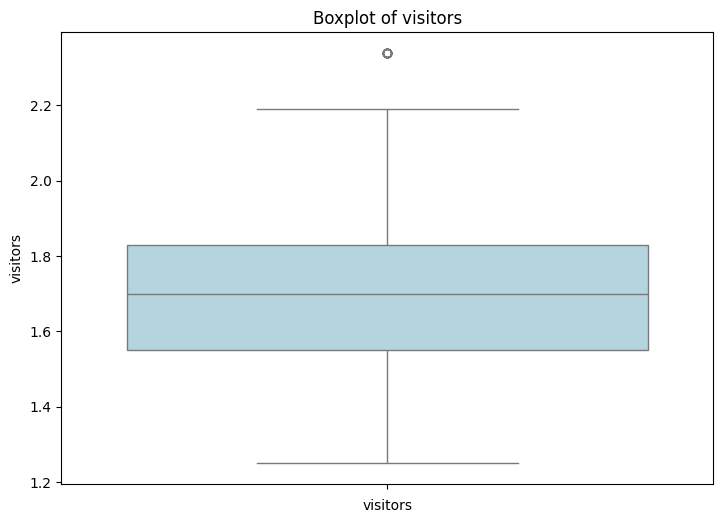

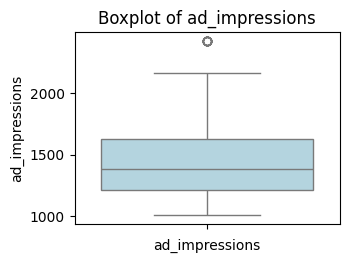

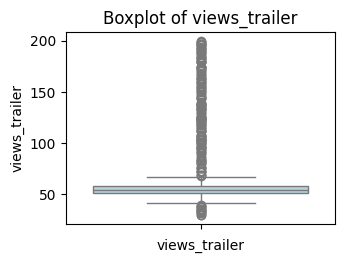

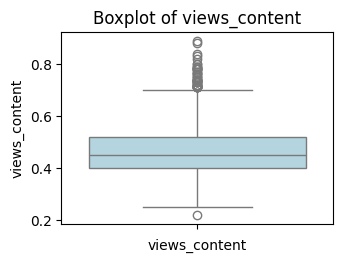

In [ ]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [ ]:
outlier_values = {}

# Loop through each column and extract the outlier values
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_values[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].values

# Display as a dictionary
for col, values in outlier_values.items():
    print(f"\nOutlier values in '{col}':")
    print(values)


Outlier values in 'visitors':
[2.34 2.34 2.34 2.34 2.34 2.34 2.34 2.34 2.34 2.34 2.34 2.34 2.34 2.34
 2.34 2.34 2.34 2.34 2.34 2.34]

Outlier values in 'ad_impressions':
[2424.2 2424.2 2424.2 2424.2 2424.2 2424.2 2424.2 2424.2 2424.2 2424.2
 2424.2 2424.2 2424.2]

Outlier values in 'views_trailer':
[190.02 195.31 161.56 192.32 124.43 129.2  100.65 100.46 122.94 130.95
  91.49 106.3  193.46 181.11 191.37  72.08 125.22 172.77  30.34  33.51
 188.95 144.25 117.66 185.5  133.64 163.43 114.09 189.   174.04  98.98
 144.08 159.62 198.31 179.49  95.67 166.6  196.92  89.94 125.77 195.64
 170.55 116.13  39.81 115.26  83.81 105.54 136.83 135.75 103.33  68.54
 148.29  90.5  138.91 106.34  94.84 183.38  68.88 108.2   34.68  75.73
  80.19  38.82 123.38  96.61  91.94 117.85 179.15 180.06 122.22 100.71
 112.03  30.08  93.45 179.51 123.43  85.29  31.72 125.82 191.92  83.19
  37.72 179.26 165.58 160.   184.12  35.55 151.45 103.03  82.5  159.73
 123.12 147.26 149.64  86.69 136.76  38.1   76.14 111.86 162

We are retaining the outlier as they reflect legitimate business outcomes and provide valuable information for understanding what drives exceptional content performance.

##Univariate analysis

## 1. What does the distribution of content views look like?

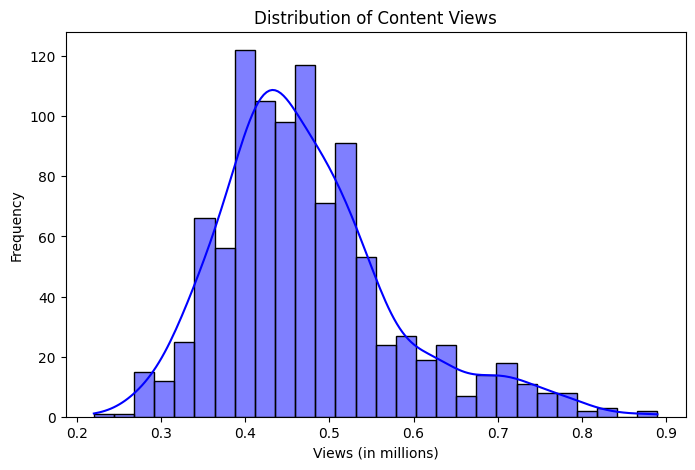

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['views_content'], kde=True, color='blue')
plt.title("Distribution of Content Views")
plt.xlabel("Views (in millions)")
plt.ylabel("Frequency")
plt.show()

## 2. What does the distribution of genres look like?

/tmp/ipython-input-1076894600.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index, palette='viridis')


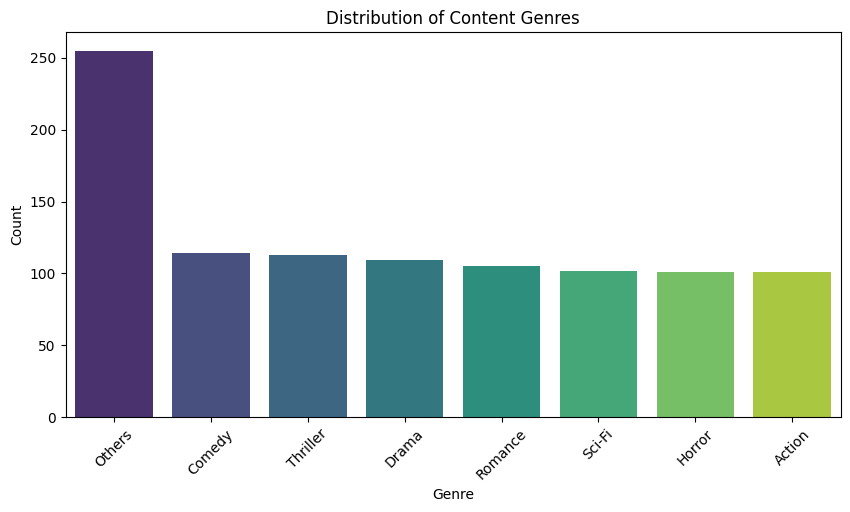

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index, palette='viridis')
plt.title("Distribution of Content Genres")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

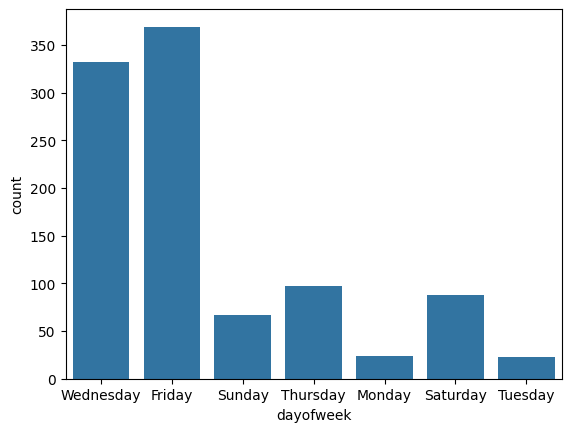

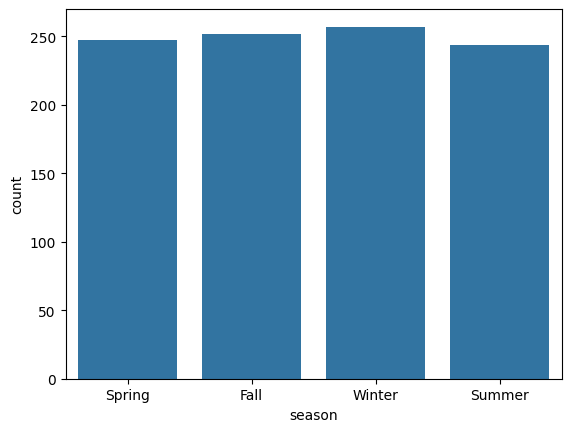

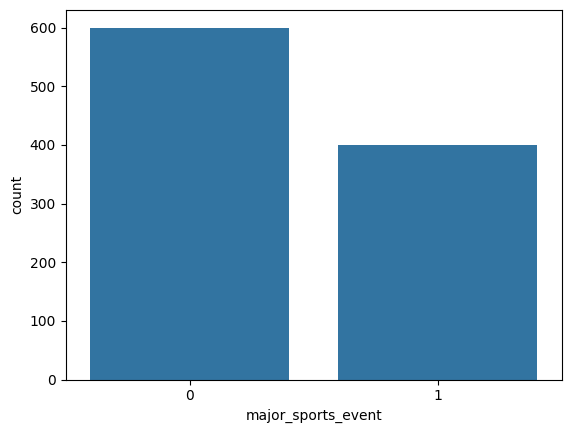

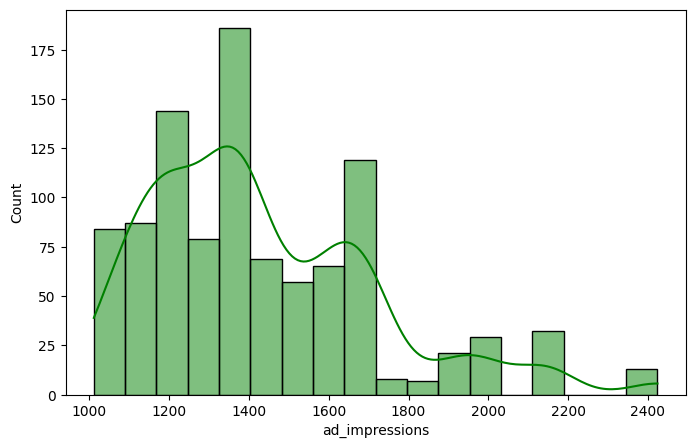

In [ ]:
# dayofweek
sns.countplot(data=df, x='dayofweek')
plt.show()

# season
sns.countplot(data=df, x='season')
plt.show()

# major_sports_event
sns.countplot(data=df, x='major_sports_event')
plt.show()

#ad_impressions
plt.figure(figsize=(8, 5))
sns.histplot(df['ad_impressions'], kde=True, color='green')
plt.show()


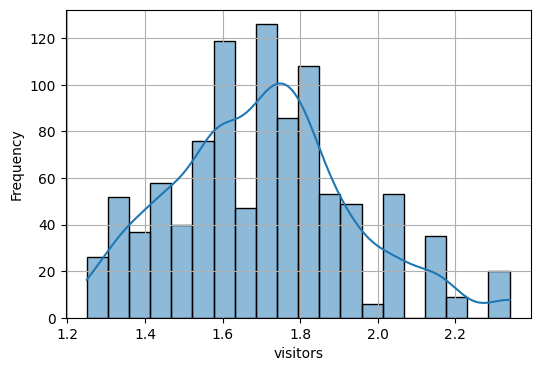

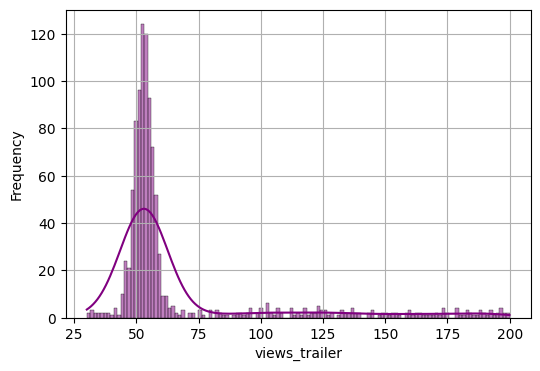

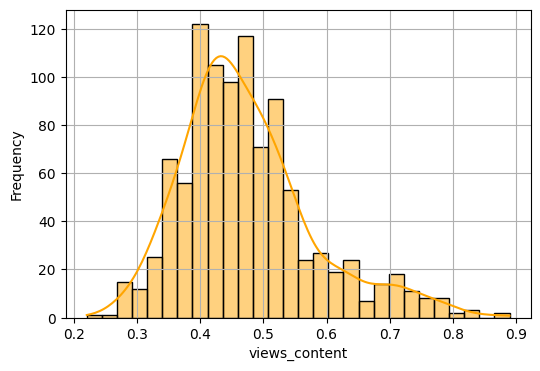

In [ ]:
# Visitors
plt.figure(figsize=(6,4))
sns.histplot(df['visitors'], kde=True)
plt.xlabel('visitors')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Trailer Views
plt.figure(figsize=(6,4))
sns.histplot(df['views_trailer'], kde=True, color='purple')
plt.xlabel('views_trailer')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Content Views
plt.figure(figsize=(6,4))
sns.histplot(df['views_content'], kde=True, color='orange')
plt.xlabel('views_content')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##Bivariate Analysis

## 3. The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?

/tmp/ipython-input-3113314732.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dayofweek', y='views_content', palette='Set3')


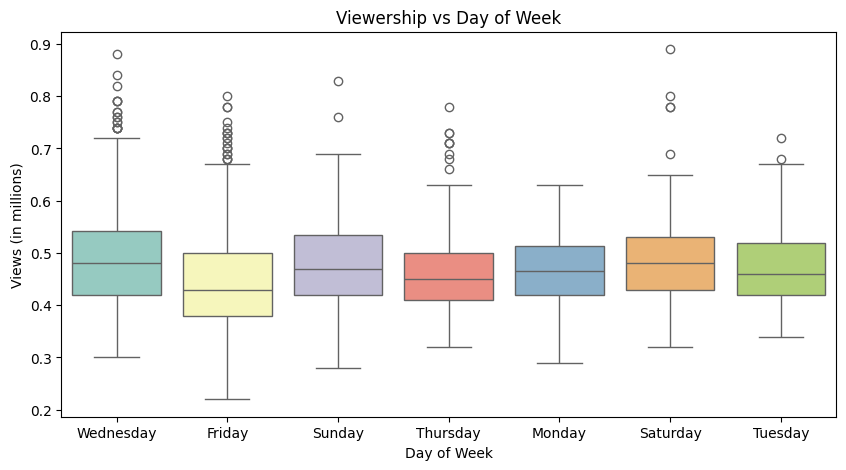

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='dayofweek', y='views_content', palette='Set3')
plt.title("Viewership vs Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Views (in millions)")
plt.show()

## 4. How does the viewership vary with the season of release?

/tmp/ipython-input-2681149673.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='season', y='views_content', palette='coolwarm')


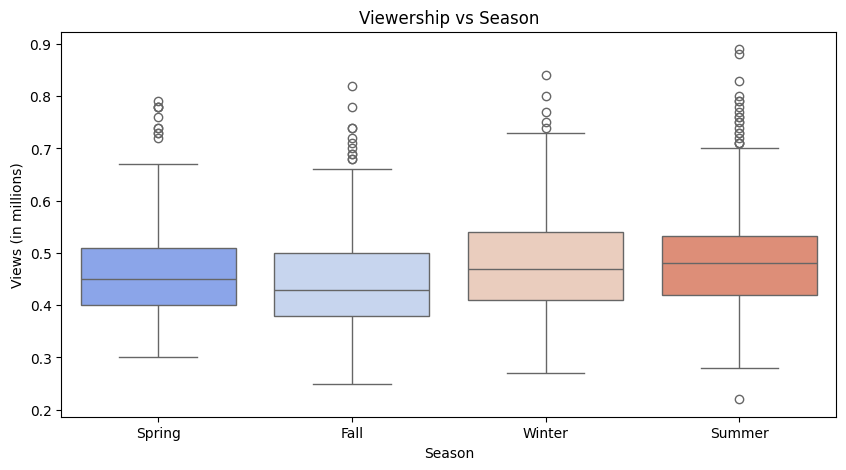

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='season', y='views_content', palette='coolwarm')
plt.title("Viewership vs Season")
plt.xlabel("Season")
plt.ylabel("Views (in millions)")
plt.show()

## 5.What is the correlation between trailer views and content views?

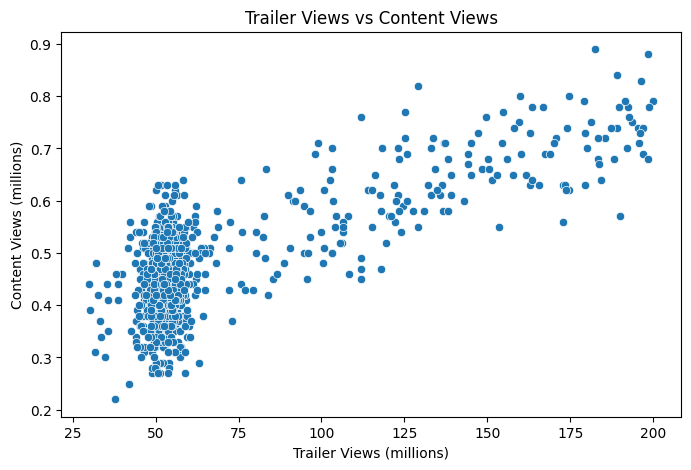

,views_trailer,views_content
views_trailer,1.000000,0.753962
views_content,0.753962,1.000000


In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='views_trailer', y='views_content')
plt.title("Trailer Views vs Content Views")
plt.xlabel("Trailer Views (millions)")
plt.ylabel("Content Views (millions)")
plt.show()

# Correlation
df[['views_trailer', 'views_content']].corr()

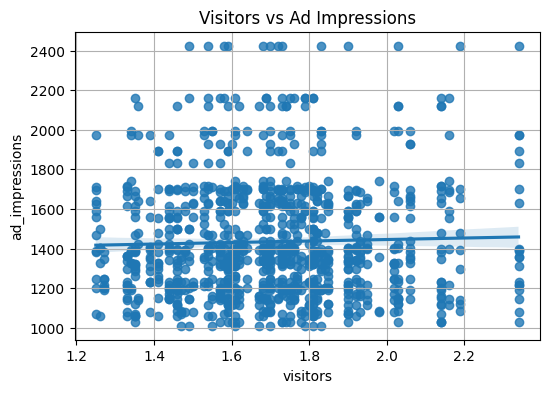

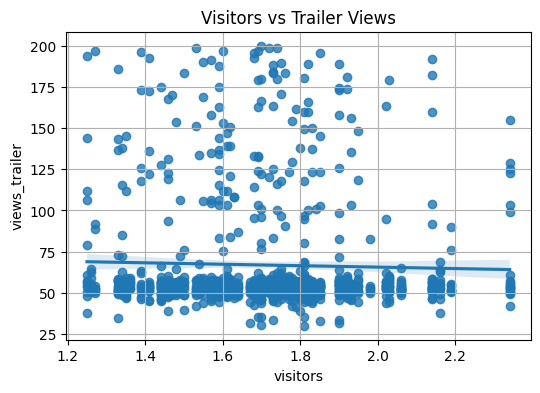

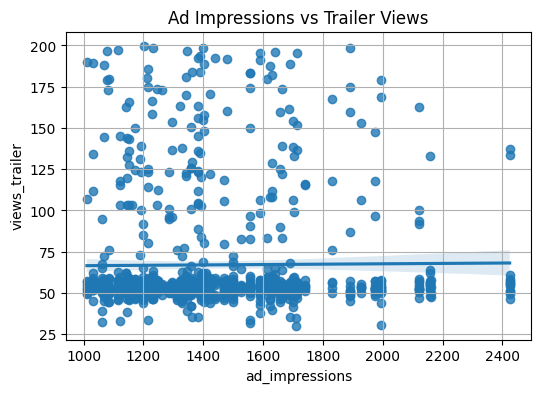

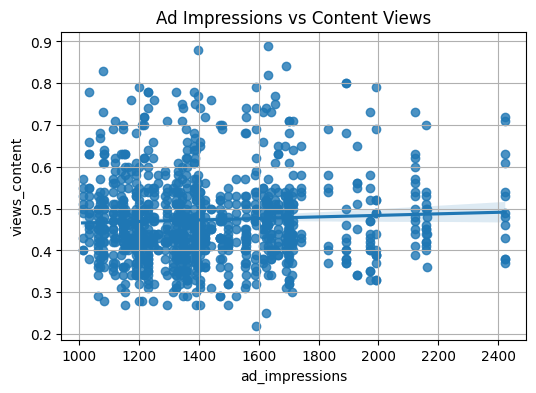

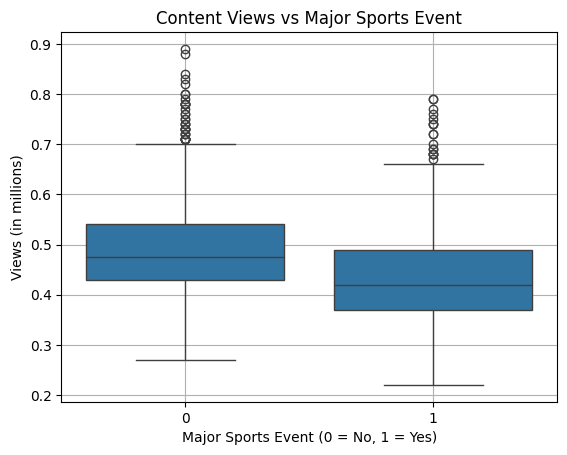

In [ ]:
# Visitors vs Ad Impressions
plt.figure(figsize=(6,4))
sns.regplot(x='visitors', y='ad_impressions', data=df)
plt.title('Visitors vs Ad Impressions')
plt.grid(True)
plt.show()

# Visitors vs Views Trailer
plt.figure(figsize=(6,4))
sns.regplot(x='visitors', y='views_trailer', data=df)
plt.title('Visitors vs Trailer Views')
plt.grid(True)
plt.show()

# Ad Impressions vs Trailer Views
plt.figure(figsize=(6,4))
sns.regplot(x='ad_impressions', y='views_trailer', data=df)
plt.title('Ad Impressions vs Trailer Views')
plt.grid(True)
plt.show()

# Ad Impressions vs Content Views
plt.figure(figsize=(6,4))
sns.regplot(x='ad_impressions', y='views_content', data=df)
plt.title('Ad Impressions vs Content Views')
plt.grid(True)
plt.show()

# Major sports event vs Content Views
sns.boxplot(x='major_sports_event', y='views_content', data=df)
plt.title('Content Views vs Major Sports Event')
plt.xlabel('Major Sports Event (0 = No, 1 = Yes)')
plt.ylabel('Views (in millions)')
plt.grid(True)
plt.show()

## Feature Engineering

In [ ]:
#One-hot encode only the required categorical variables
df_encoded = pd.get_dummies(df, columns=['genre', 'season', 'dayofweek'], drop_first=True)

# Verify final columns
df_encoded.columns

Index(['visitors', 'ad_impressions', 'major_sports_event', 'views_trailer',
       'views_content', 'genre_Comedy', 'genre_Drama', 'genre_Horror',
       'genre_Others', 'genre_Romance', 'genre_Sci-Fi', 'genre_Thriller',
       'season_Spring', 'season_Summer', 'season_Winter', 'dayofweek_Monday',
       'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday',
       'dayofweek_Tuesday', 'dayofweek_Wednesday'],
      dtype='object')

## Data prep for Modeling

In [ ]:
# Define target and predictors
y = df_encoded['views_content']
X = df_encoded.drop(columns=['views_content'])

# Train-test split (80-20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant for statsmodels OLS
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

# Shape check
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (800, 20)
y_train shape: (800,)


###  Interpretation

- The target variable is `views_content`.
- Categorical variables were previously dummy-encoded.
- The dataset was split into training (80%) and testing (20%) subsets to evaluate model generalization.
- A constant column was added to the training set using `sm.add_constant()` for `statsmodels.OLS()` which does not include intercept by default.


##Model Building

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on train and test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Train R² Score:", round(r2_train, 4))
print("Test R² Score:", round(r2_test, 4))

# Coefficients
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("\nIntercept:", model.intercept_)
print("\nCoefficients (sorted):")
print(coefficients)

Train R² Score: 0.7868
Test R² Score: 0.7743

Intercept: 0.05478729309686681

Coefficients (sorted):
visitors               0.128909
dayofweek_Saturday     0.052561
dayofweek_Wednesday    0.049532
dayofweek_Monday       0.045065
season_Summer          0.044605
dayofweek_Sunday       0.038818
dayofweek_Tuesday      0.032412
season_Winter          0.026532
season_Spring          0.023201
dayofweek_Thursday     0.019637
genre_Thriller         0.011518
genre_Drama            0.010636
genre_Sci-Fi           0.010008
genre_Horror           0.009434
genre_Others           0.004984
genre_Comedy           0.004389
views_trailer          0.002311
ad_impressions         0.000008
genre_Romance         -0.001385
major_sports_event    -0.059559
dtype: float64


###  Interpretation

- The linear regression model was built using the training set of 800 records with 20 predictors.
- **Train R² Score**: 0.7868 → The model explains ~78.7% of the variance in the training data.
- **Test R² Score**: 0.7743 → Indicates good generalization performance on unseen data, with minimal overfitting.
- **Intercept**: 0.0548

####  Key Positive Drivers:
- `visitors` (0.1289): Most influential positive variable.
- `dayofweek_Saturday`, `Wednesday`, `Monday`: Indicate higher viewership on these days.
- `season_Summer` (0.0446): Suggests summer releases perform better.

#### Weak or Negative Impact:
- `major_sports_event` (−0.0596): Indicates significantly lower viewership during major sports events.
- `genre_Romance` shows a slight negative association with first-day views.

- Overall, the model provides a reliable prediction framework for first-day viewership using genre, timing, and user behavior variables.

## Assumption Testing – OLS Diagnostics

In [ ]:
# Convert to float to fix object dtype issue
X_train_sm = X_train_sm.astype(float)
y_train = y_train.astype(float)

# Now fit the model
olsmodel = sm.OLS(y_train, X_train_sm).fit()

# Display summary
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          views_content   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     143.8
Date:                Thu, 07 Aug 2025   Prob (F-statistic):          2.53e-245
Time:                        06:41:03   Log-Likelihood:                 1279.0
No. Observations:                 800   AIC:                            -2516.
Df Residuals:                     779   BIC:                            -2418.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0548      0.018      3.109      0.002       0.020       0.089
visitors                0.1289      0.008     16.873      0.000       0.114       0.144
ad_impressions       8.116e-06   6.05e-06      1.342      0.180   -3.75e-06       2e-05
major_sports_event     -0.0596      0.004    -16.280      0.000      -0.067      -0.052
views_trailer           0.0023   5.04e-05     45.849      0.000       0.002       0.002
genre_Comedy            0.0044      0.008      0.563      0.573      -0.011       0.020
genre_Drama             0.0106      0.008      1.374      0.170      -0.005       0.026
genre_Horror            0.0094      0.008      1.215      0.225      -0.006       0.025
genre_Others            0.0050      0.007      0.742      0.459      -0.008       0.018
genre_Romance          -0.0014      0.008     -0.179      0.858      -0.017       0.014
genre_Sci-Fi            0.0100      0.008      1.242      0.215      -0.006       0.026
genre_Thriller          0.0115      0.008      1.479      0.140      -0.004       0.027
season_Spring           0.0232      0.005      4.632      0.000       0.013       0.033
season_Summer           0.0446      0.005      8.705      0.000       0.035       0.055
season_Winter           0.0265      0.005      5.300      0.000       0.017       0.036
dayofweek_Monday        0.0451      0.012      3.712      0.000       0.021       0.069
dayofweek_Saturday      0.0526      0.007      7.692      0.000       0.039       0.066
dayofweek_Sunday        0.0388      0.007      5.287      0.000       0.024       0.053
dayofweek_Thursday      0.0196      0.006      3.181      0.002       0.008       0.032
dayofweek_Tuesday       0.0324      0.013      2.588      0.010       0.008       0.057
dayofweek_Wednesday     0.0495      0.004     11.706      0.000       0.041       0.058
==============================================================================
Omnibus:                        2.150   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                2.162
Skew:                           0.126   Prob(JB):                        0.339
Kurtosis:                       2.965   Cond. No.                     1.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  Interpretation

- **R-squared** = **0.787**: Model explains ~78.7% of the variance in the training data.
- **Adjusted R-squared** = **0.781**: Adjusted for number of predictors, still strong.
- **F-statistic = 143.8** with **p-value < 0.001**: The overall model is statistically significant.

####  Variable Significance (`P > |t|`)
- The following variables are **statistically significant** (p < 0.05):
  - `visitors` (0.1289, p < 0.001)
  - `views_trailer` (0.0023, p < 0.001)
  - `major_sports_event` (−0.0596, p < 0.001)
  - `season_Spring`, `Summer`, `Winter`
  - `dayofweek_Monday`, `Saturday`, `Sunday`, `Thursday`, `Tuesday`, `Wednesday`

- The following variables were **not statistically significant**:
  - `ad_impressions`, `genre_Comedy`, `genre_Romance`, `genre_Drama`, `genre_Horror`, `genre_Sci-Fi`, `genre_Others`, `genre_Thriller`

####  Residual Analysis
- **Durbin-Watson = 2.038**: Suggests no autocorrelation in residuals (ideal value ~2).
- **Omnibus / Jarque-Bera p-values > 0.05**: Residuals are approximately normally distributed.
- **Skew = 0.126**, **Kurtosis = 2.965**: Residual distribution is close to normal.

####  Multicollinearity Alert
- **Condition Number = 1.69e+04**: A high condition number (typically > 30 or 1000) may suggest multicollinearity.

➡️ We'll investigate this further using **Variance Inflation Factor (VIF)** in the next step.

##VIF check


What is VIF?
VIF > 5: Potential multicollinearity

VIF > 10: Severe multicollinearity — variable may need to be dropped or transformed

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Exclude the constant column for VIF calculation
X_vif = X_train_sm.drop(columns=['const'])

# Create VIF dataframe
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Display VIFs
vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
0,visitors,26.065912
1,ad_impressions,19.731307
3,views_trailer,4.511708
7,genre_Others,3.261380
13,season_Winter,2.088696
5,genre_Drama,2.068384
8,genre_Romance,2.038509
6,genre_Horror,2.037733
11,season_Spring,2.011645
10,genre_Thriller,2.010787


### Multicollinearity Check – VIF Analysis

Variance Inflation Factor (VIF) was computed to detect multicollinearity among predictor variables.

####  Key Findings:
- **visitors** (VIF = 26.07) and **ad_impressions** (VIF = 19.73) have **very high VIF values**, indicating **strong multicollinearity**.
- This suggests these two variables are highly correlated with other predictors in the model — possibly even with each other.
- **views_trailer** (VIF = 4.51) is approaching the threshold but still acceptable.
- All other variables have VIF values **well below 5**, indicating **no multicollinearity concerns** for them.



## Residual Diagnostics

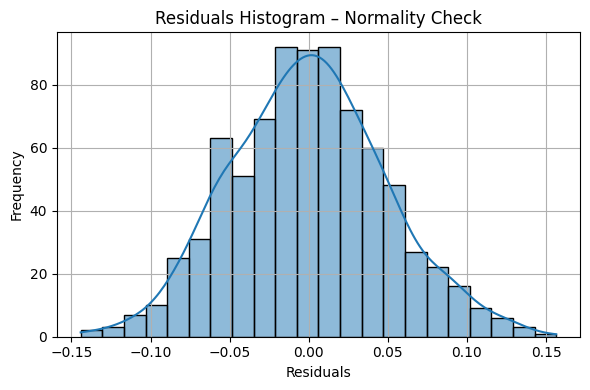

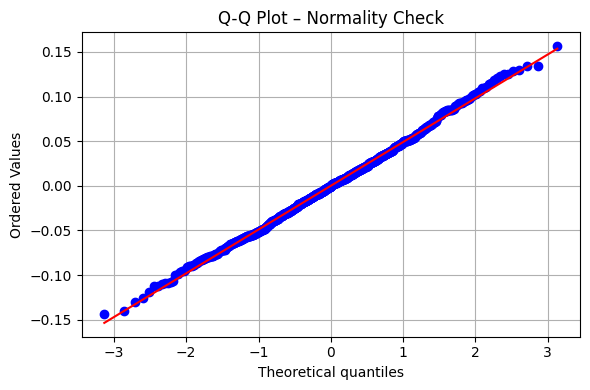

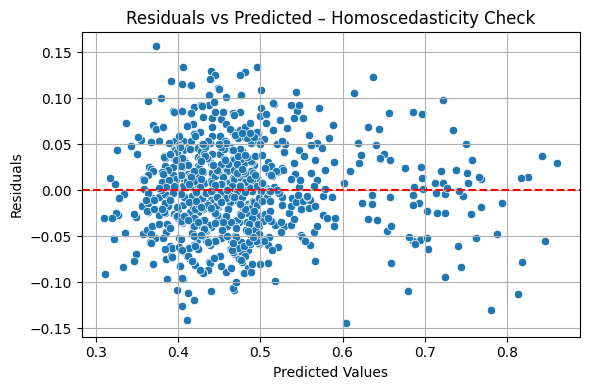

In [ ]:
# Residuals
residuals = y_train - y_train_pred

# 1. Histogram of residuals
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residuals Histogram – Normality Check")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Q-Q Plot (normality)
plt.figure(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot – Normality Check")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Residuals vs Predicted (Homoscedasticity)
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted – Homoscedasticity Check")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()


### To ensure the linear regression model satisfies classical assumptions, residual diagnostics were conducted:

####  Normality of Residuals:
- The histogram and Q-Q plot of residuals show a roughly symmetric, bell-shaped distribution.
- The residuals align closely along the diagonal in the Q-Q plot.
-  Interpretation: Residuals are approximately normally distributed.

####  Homoscedasticity (Equal Variance):
- The residuals vs predicted plot shows residuals scattered evenly around 0.
- No clear funnel shape or curvature is observed.
-  Interpretation: Variance of residuals is constant (no heteroscedasticity).

####  Independence of Errors:
- Already verified using **Durbin-Watson = 2.038** in the OLS summary.
-  Interpretation: No autocorrelation in residuals.

####  Conclusion:
All key assumptions for linear regression are reasonably satisfied, supporting the validity of model inference.


## Model performance Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. MAE
mae = mean_absolute_error(y_test, y_test_pred)

# 2. RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# 3. MAPE
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 0.0399
Root Mean Squared Error (RMSE): 0.0500
Mean Absolute Percentage Error (MAPE): 9.08%


To evaluate the prediction accuracy of the linear regression model, the following error metrics were calculated on the test set:


###  Final Interpretation

- The low **MAE** and **RMSE** confirm that the model makes accurate predictions with minimal average deviation.
- A **MAPE of 9.08%** indicates the model is highly reliable, as errors are under 10% — which is well within acceptable thresholds for business forecasting.
- Combined with a **strong R² (0.7743)** on the test set, the model balances **good fit** and **predictive power** effectively.
- The model can be confidently used for guiding first-day content release strategy, marketing spends, and campaign optimization on the ShowTime platform.